### Student Information
Name:陳瑋

Student ID:105022214

GitHub ID:qaz20031616

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

# Lab 1：Take home exercises

### - import the library:

In [2]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from numpy import array
import math
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\瑋\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### - prepare the data

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [4]:
X[['category_name', 'text']] = X[['text', 'category_name']]
X
X.loc[:,['category_name', 'text']] = X[['text', 'category_name']].values
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [5]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B' ,                   },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [6]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

isnull() 是檢查該資料是否為null，是的話就回傳true，因此在上面被拿來當作檢查missing value的工具，以下會針對每個資料分析：

  A：若起始值給np.nan()則在表格中會被當成missing value，同時為顯示成NaN
  
  B：若不給定起始值則會直接被視為missing value，也會顯示成NaN
  
  C：起始值為字串的'NaN'，因此顯示出NaN，但卻不是missing value，這樣在檢視表格時可能會出錯，使用者可能會將不是missing value的東西誤認成
     是可能會因此錯亂
     
  D：起始值為字串的'None'，顯示None，因為有值且並非boolean的None，所以不是missing value
  
  E：起始值為boolean的None，None在python中會被當成一個空值，跟null有點類似卻不太一樣，因此就算顯示為None，但仍然會被當作missing vlaue
  
  F：起始值為''，但因為他的值並非null，而是一個字串，因此不會被isnull()視為True，也就不會被當成missing value，但理論上其應該要是missing value，因為那筆資料並無實際意義
   
  綜合上述，isnull()只能單純的檢測該值是否為null而已，對於當作missing value的檢測工具並不全面。
  

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [7]:
X_sample = X.sample(n=1000)
X_sample

,text,category,category_name
654,Subject: Re: Americans and Evolution From: hal...,0,alt.atheism
1696,From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...,0,alt.atheism
1382,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
1637,From: edm@twisto.compaq.com (Ed McCreary) Subj...,0,alt.atheism
1180,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
305,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,0,alt.atheism
1456,From: nabil@cae.wisc.edu (Nabil Ayoub) Subject...,3,soc.religion.christian
542,From: ricky@watson.ibm.com (Rick Turner) Subje...,1,comp.graphics
1238,From: mangoe@cs.umd.edu (Charley Wingate) Subj...,0,alt.atheism
723,From: halat@pooh.bears (Jim Halat) Subject: Is...,0,alt.atheism


X_sample的大小變成1000x3的矩陣，順序也跟原本的data不一樣，可以有效減少資料的大小，也因為是隨機取樣，比較不會對資料的特徵有巨大的改變

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

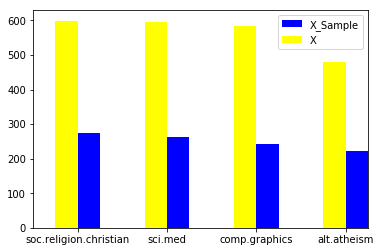

In [8]:
X_sample.category_name.value_counts().rename('X_Sample').plot(kind='bar',color = 'b',position=0,rot=0, width=0.25,legend=True)
X.category_name.value_counts().rename('X').plot(kind='bar',color = 'yellow',position=1,rot=0, width=0.25, legend=True)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [9]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
ind = np.where(X_counts[0:5, 0:100].toarray() == 1)
a = np.size(ind)/2
b = int(a)
for i in range (b):
    print(count_vect.get_feature_names()[ind[-1][i]])


00
01


第一個1代表的字是00

第二個1代表的字是01

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

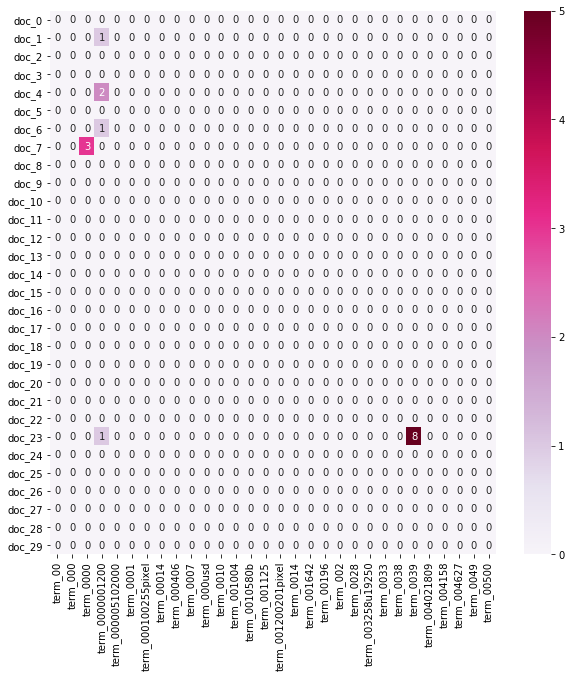

In [10]:
plot_x1 = ["term_" + str(i) for i in count_vect.get_feature_names()[0:30]]
plot_y1 = ["doc_" + str(i) for i in list(X.index)[0:30]]
plot_z1 = X_counts[100:130, 100:130].toarray()
df_todraw1 = pd.DataFrame(plot_z1, columns = plot_x1, index = plot_y1)
plt.subplots(figsize=(10, 10))
ax1 = sns.heatmap(df_todraw1,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

我只隨便印了一些資料，要印出全部的資料的話會跑不了，因為資料量太大，如果要顯示出全部的資料可能要用別種繪圖的function，例如plotly

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

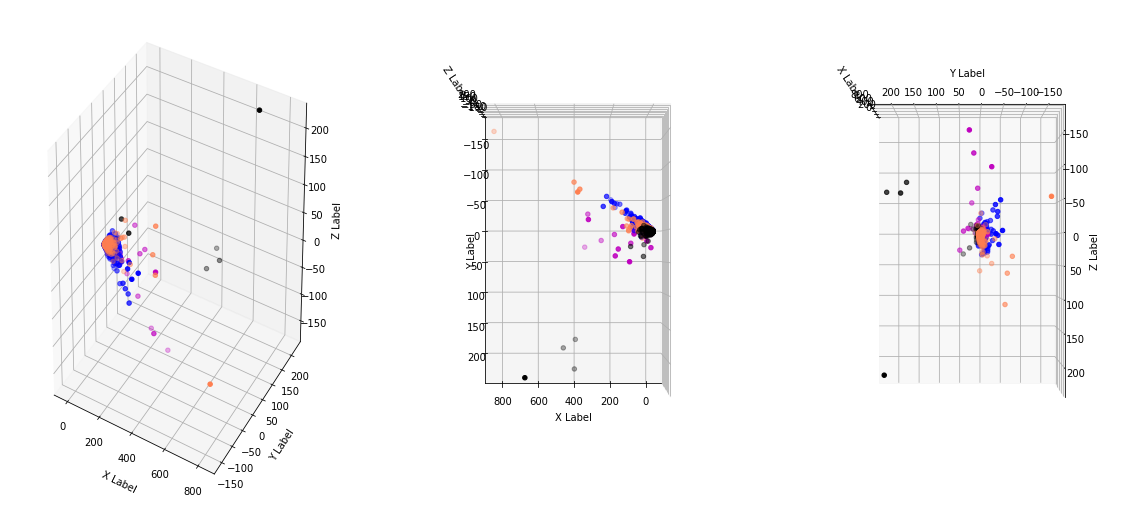

In [11]:
X_reduced1 = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'm']

# plot
fig1 = plt.figure(figsize = (20,20))

ax1 = fig1.add_subplot(231, projection='3d')
for c, category in zip(col, categories):
    xs1 = X_reduced1[X['category_name'] == category].T[0]
    ys1 = X_reduced1[X['category_name'] == category].T[1]
    zs1 = X_reduced1[X['category_name'] == category].T[2]
    ax1.scatter(xs1, ys1, zs1, c = c, marker='o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

ax2 = fig1.add_subplot(232, projection='3d')
for c, category in zip(col, categories):
    xs1 = X_reduced1[X['category_name'] == category].T[0]
    ys1 = X_reduced1[X['category_name'] == category].T[1]
    zs1 = X_reduced1[X['category_name'] == category].T[2]
    ax2.scatter(xs1, ys1, zs1, c = c, marker='o')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax2.view_init(90, 90)

ax3 = fig1.add_subplot(233, projection='3d')
for c, category in zip(col, categories):
    xs1 = X_reduced1[X['category_name'] == category].T[0]
    ys1 = X_reduced1[X['category_name'] == category].T[1]
    zs1 = X_reduced1[X['category_name'] == category].T[2]
    ax3.scatter(xs1, ys1, zs1, c = c, marker='o')

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')
ax3.view_init(180, 180)

3D圖的分布跟2D差不多，但藉由不同角度的3D圖去分析資料可以更加全面

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this. Check last year's [notebook](https://github.com/omarsar/data_mining_2017_fall_lab/blob/master/news_data_mining.ipynb) for code on how to generate the interactive version of the plot above. 

In [12]:
term_frequencies = []

for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [13]:
import plotly.plotly as py
import helpers.text_analysis as ta
import plotly
plotly.tools.set_credentials_file(username='qaz20031616', api_key='FQwpRQQ4ObHii0mpkmzV')
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

D:\PYTHON\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




The draw time for this plot will be slow for clients without much RAM.


D:\PYTHON\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


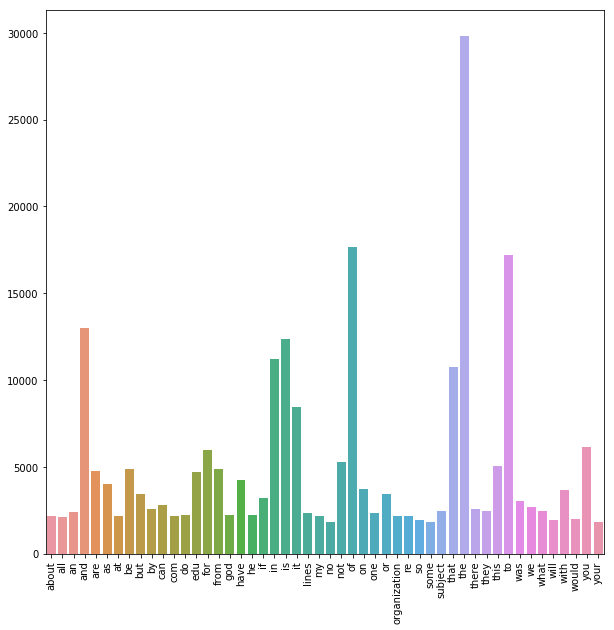

In [14]:
count_vect_max = CountVectorizer(max_features = 50)
X_counts_max = count_vect_max.fit_transform(X.text)
term_frequencies_max = []

for j in range(0,X_counts_max.shape[1]):
    term_frequencies_max.append(sum(X_counts_max[:,j].toarray()))
    
term_frequencies_max = np.asarray(X_counts_max.sum(axis=0))[0]

plt.subplots(figsize=(10, 10))
g1 = sns.barplot(x=count_vect_max.get_feature_names()[:], 
            y=term_frequencies_max[:])
g1.set_xticklabels(count_vect_max.get_feature_names()[:], rotation = 90);

將最高頻率的前50項顯示出來

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

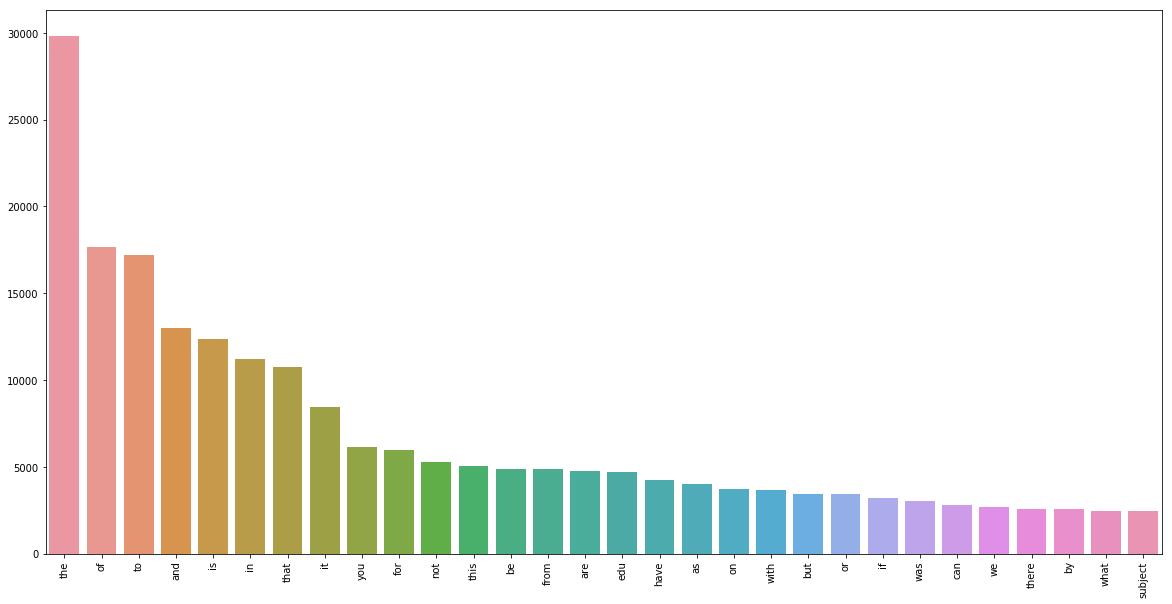

In [15]:
a = sorted(term_frequencies, reverse=True)
b = np.argsort(term_frequencies)
ytemp = []
c = []
for i in range(30):
    ytemp.append(b[-i-1])
for i in (ytemp):
    c.append(count_vect.get_feature_names()[i])

plt.subplots(figsize=(20, 10))

g1 = sns.barplot(x=c, 
            y=a[:30])
g1.set_xticklabels(c, rotation = 90);

sort了最高出現頻率的前30項

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [16]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


Yes,it works.

# Assignment 1

## Part I  (Lab 1 operation)

### - prepare data

In [17]:
dt = pd.read_table('amazon_cells_labelled.txt', header=None)
dt = dt.append(pd.read_table('imdb_labelled.txt', header=None))
dt = dt.append(pd.read_table('yelp_labelled.txt', header=None))

dt.columns = ["text","value"]

dt.value = dt.value.astype(str)

categories = ['0','1']

### - show the dataframe 

In [18]:
dt[-10:]

,text,value
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [19]:
dt.iloc[::10, :][0:10]

,text,value
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [20]:
dt.loc[::10, 'text'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: text, dtype: object

In [21]:
dt[dt['value'] == '1'].iloc[::10][0:5]

,text,value
1,"Good case, Excellent value.",1
21,I bought this to use with my Kindle Fire and a...,1
44,Excellent bluetooth headset.,1
61,I really recommend this faceplates since it lo...,1
78,"I love this phone , It is very handy and has a...",1


### - check the missing value

In [22]:
dt.isnull().apply(lambda x: dmh.check_missing_values(x))

text     (The amoung of missing records is: , 0)
value    (The amoung of missing records is: , 0)
dtype: object

### - check the duplication

### - show the sum of dulplication

In [23]:
print("len of the data:",len(dt))
print("number of duplication:",sum(dt.duplicated('text')),'\n')

len of the data: 2748
number of duplication: 17 



### - elimate the duplication by drop_duplicates()

In [24]:
dt.drop_duplicates(keep='first', inplace=True)

keep = 'first' 表示保留第一個重複的資料，也可以選擇保留最後一個或是把重複的資料全部刪除

In [25]:
print("len of the data:",len(dt))
print("number of duplication:",sum(dt.duplicated('text')),'\n')

len of the data: 2731
number of duplication: 0 



重複的資料的確被刪除了

### - sample the data

In [26]:
dt_sample = dt.sample(n=1000)
dt_sample[0:4]

,text,value
15,It had some average acting from the main perso...,0
998,The only thing that disappoint me is the infra...,0
450,I don't think we'll be going back anytime soon.,0
649,This one just fails to create any real suspens...,0


### - visualization of the data

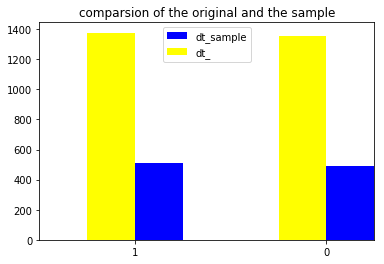

In [27]:
dt_sample.value.rename('dt_sample').value_counts().plot(kind='bar', color='b',position=0, width=0.25,legend=True,title = 'comparsion of the original and the sample')
dt.value.rename("dt_").value_counts().plot(kind='bar', color='yellow',position=1,rot=0, width=0.25, legend=True)

### - feature creation 

In [28]:
dt['unigrams'] = dt['text'].apply(lambda x: dmh.tokenize_text(x))

In [29]:
dt[0:4]

,text,value,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."


In [30]:
list(dt[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### - feature subset selection 

In [31]:
count_vect = CountVectorizer()
dt_counts = count_vect.fit_transform(dt.text)

In [32]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(dt[:1].text)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [33]:
dt_counts.shape

(2731, 5155)

In [34]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [35]:
dt_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [36]:
ind = np.where(dt_counts[0:5, 0:100].toarray() == 1)
a = np.size(ind)/2
b = int(a)
for i in range (b):
    print(count_vect.get_feature_names()[ind[-1][i]])

45


第一個1代表的字是45

### - show by heatmap

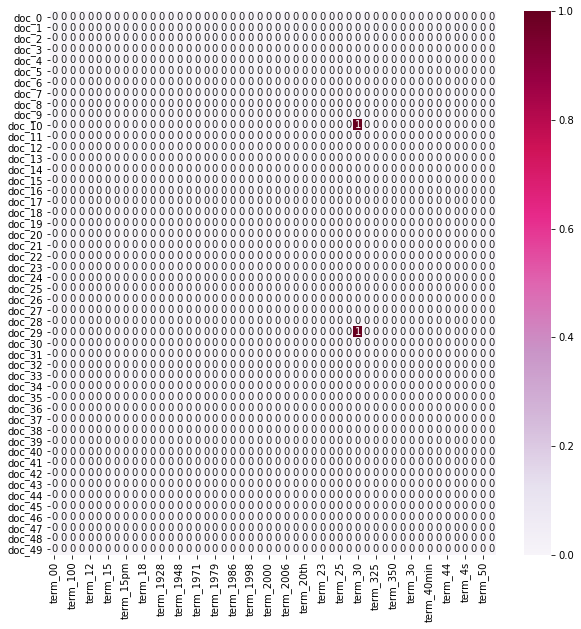

In [37]:
plot_x1 = ["term_" + str(i) for i in count_vect.get_feature_names()[0:50]]
plot_y1 = ["doc_" + str(i) for i in list(dt.index)[0:50]]
plot_z1 = dt_counts[120:170, 120:170].toarray()
df_todraw1 = pd.DataFrame(plot_z1, columns = plot_x1, index = plot_y1)
plt.subplots(figsize=(10, 10))
ax1 = sns.heatmap(df_todraw1,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### - dimensionality reduction and figure

### - using PCA and show in 2D/3D

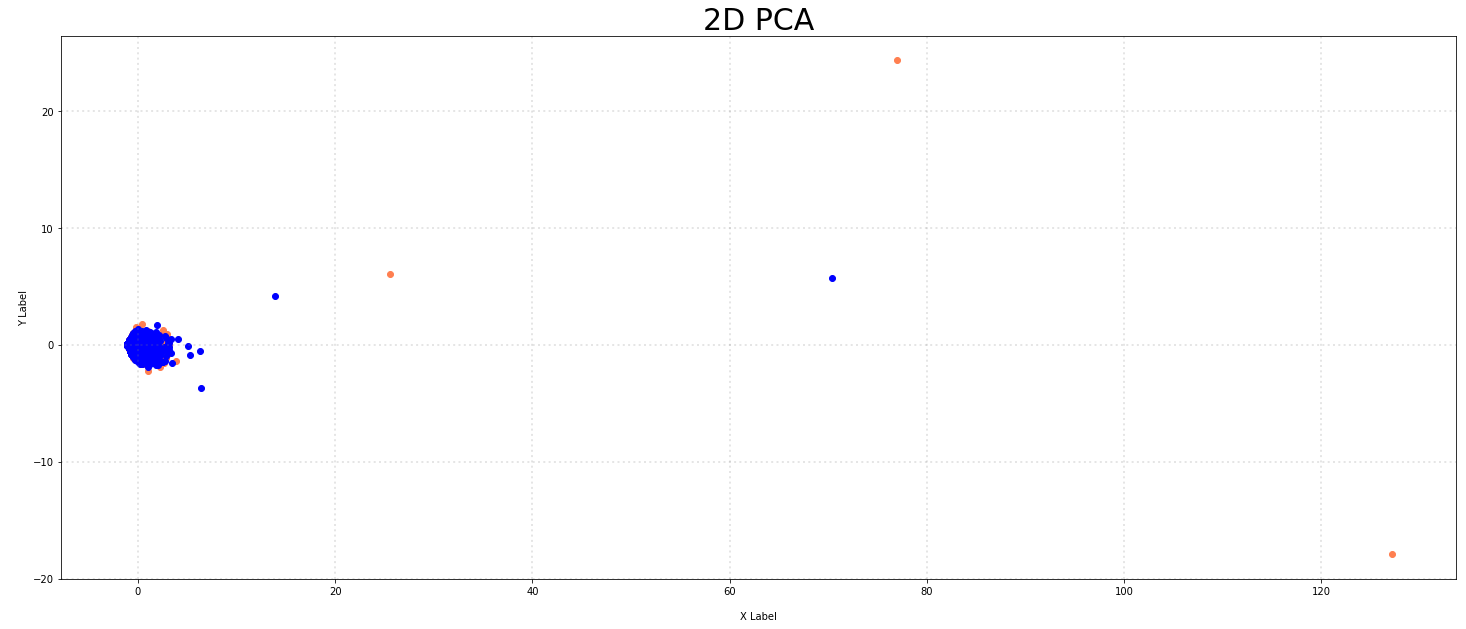

In [38]:
dt_reduced = PCA(n_components = 2).fit_transform(dt_counts.toarray())
col = ['coral', 'blue']

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = dt_reduced[dt['value'] == category].T[0]
    ys = dt_reduced[dt['value'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_title('2D PCA', fontsize=30)

plt.show()

Text(0.5,0.98,'3D PCA')

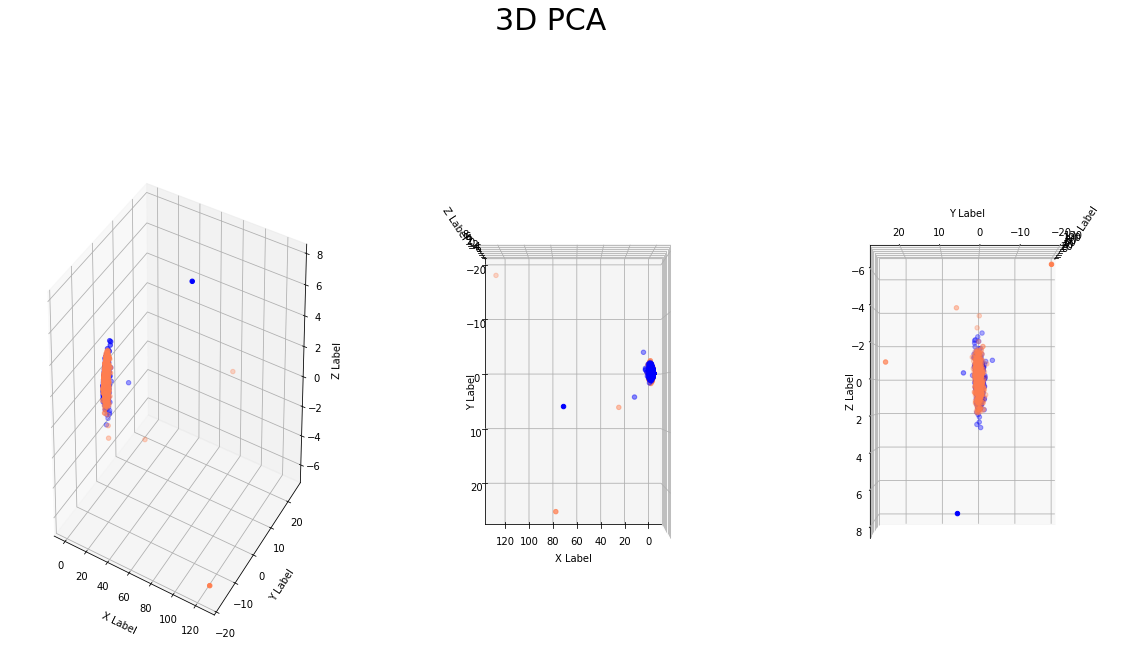

In [39]:
dt_reduced = PCA(n_components = 3).fit_transform(dt_counts.toarray())

col = ['coral', 'blue']

fig1 = plt.figure(figsize = (20,20))

ax1 = fig1.add_subplot(231, projection='3d')
for c, category in zip(col, categories):
    xs1 = dt_reduced[dt['value'] == category].T[0]
    ys1 = dt_reduced[dt['value'] == category].T[1]
    zs1 = dt_reduced[dt['value'] == category].T[2]
    ax1.scatter(xs1, ys1, zs1, c = c, marker='o')

ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

ax2 = fig1.add_subplot(232, projection='3d')
for c, category in zip(col, categories):
    xs1 = dt_reduced[dt['value'] == category].T[0]
    ys1 = dt_reduced[dt['value'] == category].T[1]
    zs1 = dt_reduced[dt['value'] == category].T[2]
    ax2.scatter(xs1, ys1, zs1, c = c, marker='o')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax2.view_init(90, 90)

ax3 = fig1.add_subplot(233, projection='3d')
for c, category in zip(col, categories):
    xs1 = dt_reduced[dt['value'] == category].T[0]
    ys1 = dt_reduced[dt['value'] == category].T[1]
    zs1 = dt_reduced[dt['value'] == category].T[2]
    ax3.scatter(xs1, ys1, zs1, c = c, marker='o')
    
ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')
ax3.view_init(180, 180)

plt.suptitle('3D PCA', fontsize=30)

### - atrribute transformation / aggregation

In [40]:
term_frequencies = []
for j in range(0,dt_counts.shape[1]):
    term_frequencies.append(sum(dt_counts[:,j].toarray()))
    
term_frequencies = np.asarray(dt_counts.sum(axis=0))[0]

### - sort and show the highest 30 frequencies

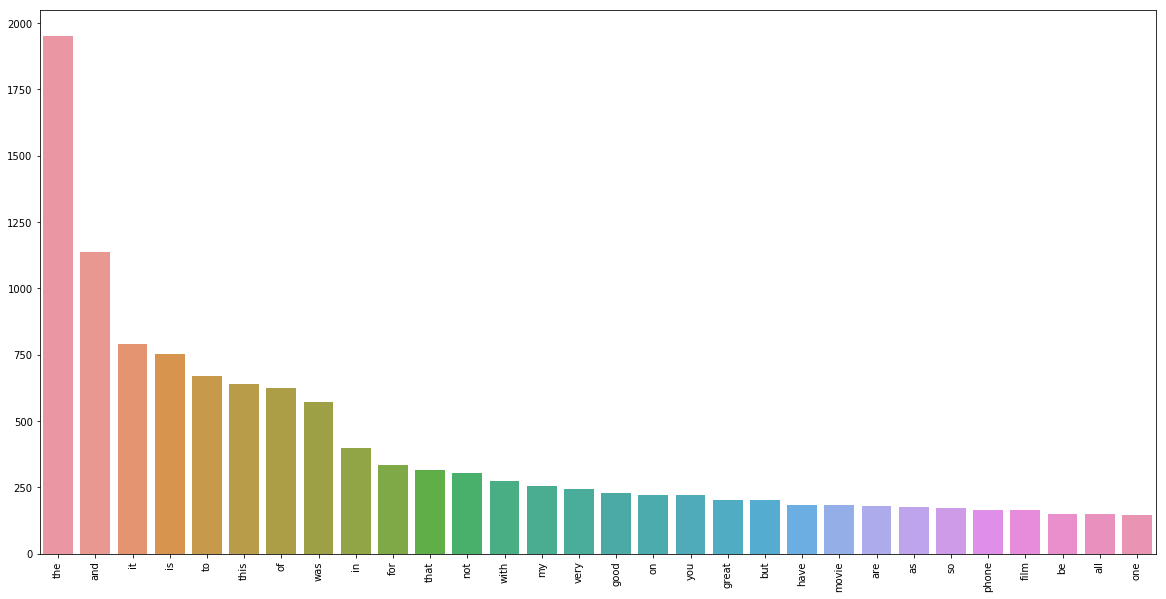

In [41]:
a = sorted(term_frequencies, reverse=True)
b = np.argsort(term_frequencies)
ytemp = []
c = []
for i in range(30):
    ytemp.append(b[-i-1])
for i in (ytemp):
    c.append(count_vect.get_feature_names()[i])

plt.subplots(figsize=(20, 10))

g1 = sns.barplot(x=c, 
            y=a[:30])
g1.set_xticklabels(c, rotation = 90);

### - show the picture by plotly

In [42]:
import helpers.text_analysis as ta
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='qaz20031616', api_key='FQwpRQQ4ObHii0mpkmzV')
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

D:\PYTHON\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




### - discretization and binarization

In [43]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(dt.value)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [44]:
mlb.classes_

array(['0', '1'], dtype='<U1')

In [45]:
dt['bin_value'] = mlb.transform(dt['value']).tolist()
dt[0:9]

,text,value,unigrams,bin_value
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


## - Part II (Generate TF-IDF features)

### - feature subset selection 

In [46]:
tfidf_vect = TfidfVectorizer()
dt_tfidf = tfidf_vect.fit_transform(dt.text)

In [47]:
analyze = tfidf_vect.build_analyzer()
analyze(" ".join(list(dt[:1].text)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [48]:
dt_tfidf.shape

(2731, 5155)

In [49]:
tfidf_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [50]:
dt_tfidf[0:5, 0:100].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

### - show by heatmap

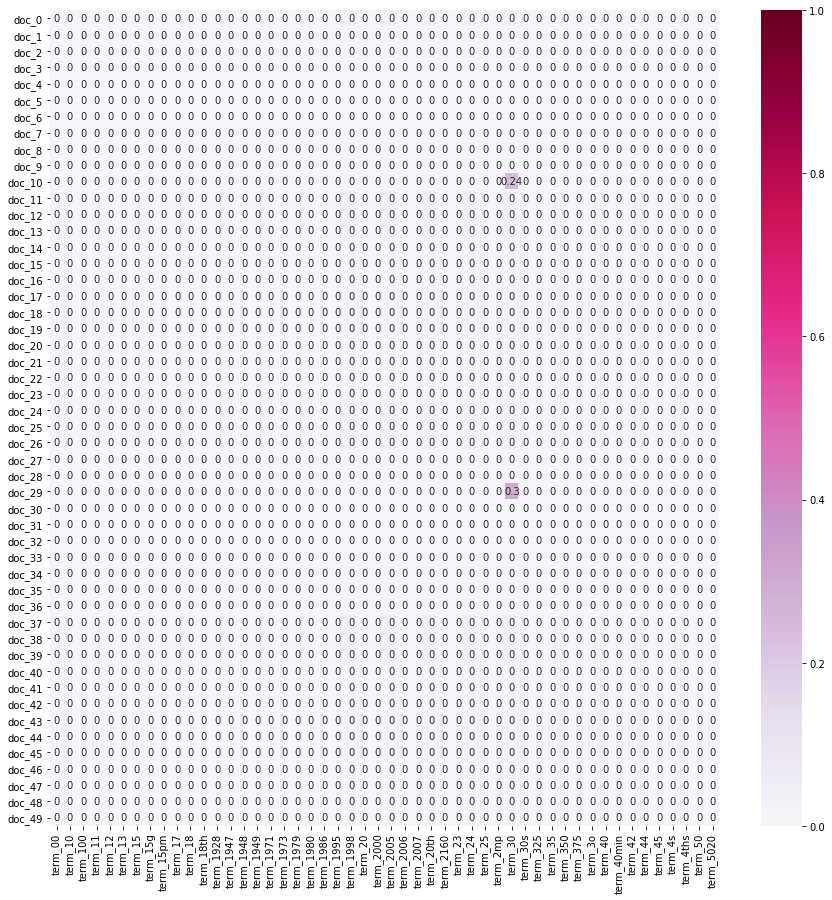

In [51]:
plot_x1 = ["term_" + str(i) for i in tfidf_vect.get_feature_names()[0:50]]
plot_y1 = ["doc_" + str(i) for i in list(dt.index)[0:50]]
plot_z1 = dt_tfidf[120:170, 120:170].toarray()
df_todraw1 = pd.DataFrame(plot_z1, columns = plot_x1, index = plot_y1)
plt.subplots(figsize=(15, 15))
ax1 = sns.heatmap(df_todraw1,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### - sort and show the highest 30 frequencies

In [52]:
term_frequencies = []
for j in range(0,dt_tfidf.shape[1]):
    term_frequencies.append(sum(dt_tfidf[:,j].toarray()))
    
term_frequencies = np.asarray(dt_tfidf.sum(axis=0))[0]

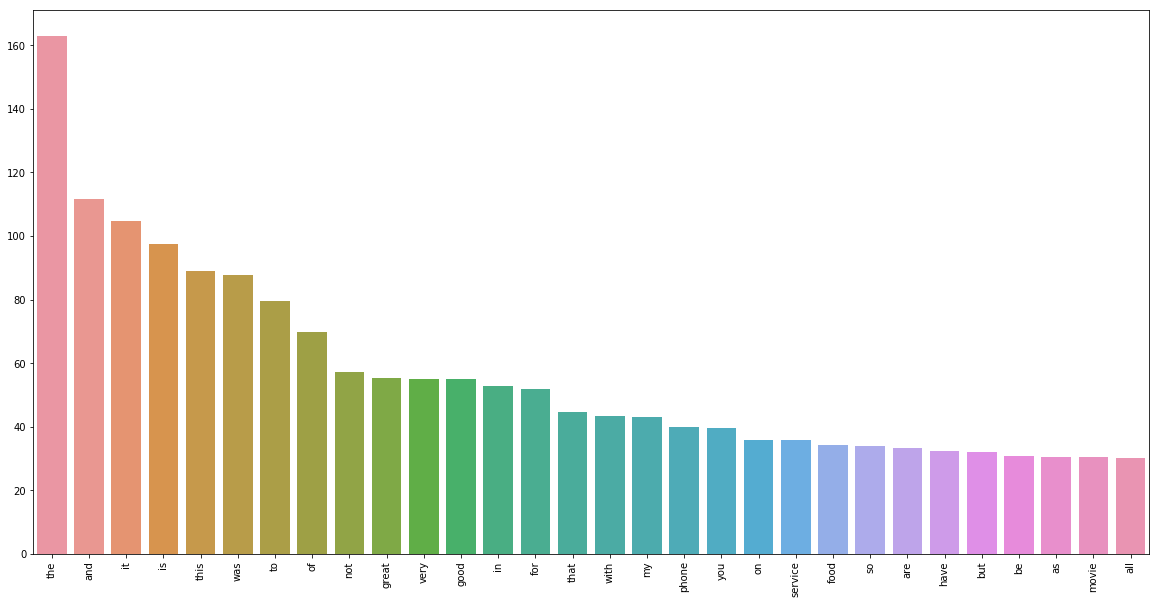

In [53]:
a = sorted(term_frequencies, reverse=True)
b = np.argsort(term_frequencies)
ytemp = []
c = []
for i in range(30):
    ytemp.append(b[-i-1])
for i in (ytemp):
    c.append(tfidf_vect.get_feature_names()[i])

plt.subplots(figsize=(20, 10))

g1 = sns.barplot(x=c, 
            y=a[:30])
g1.set_xticklabels(c, rotation = 90);

### - show the picture by plotly

In [54]:
import helpers.text_analysis as ta
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='qaz20031616', api_key='FQwpRQQ4ObHii0mpkmzV')
py.iplot(ta.plot_word_frequency([tfidf_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

D:\PYTHON\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




## Part III (Cosine Similarity)

In [55]:
from sklearn.metrics.pairwise import cosine_similarity

### - choose 20 data to do cosine similarity (show by heat map)

### - cosine similarity of TF-IDF

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text yticklabel objects>)

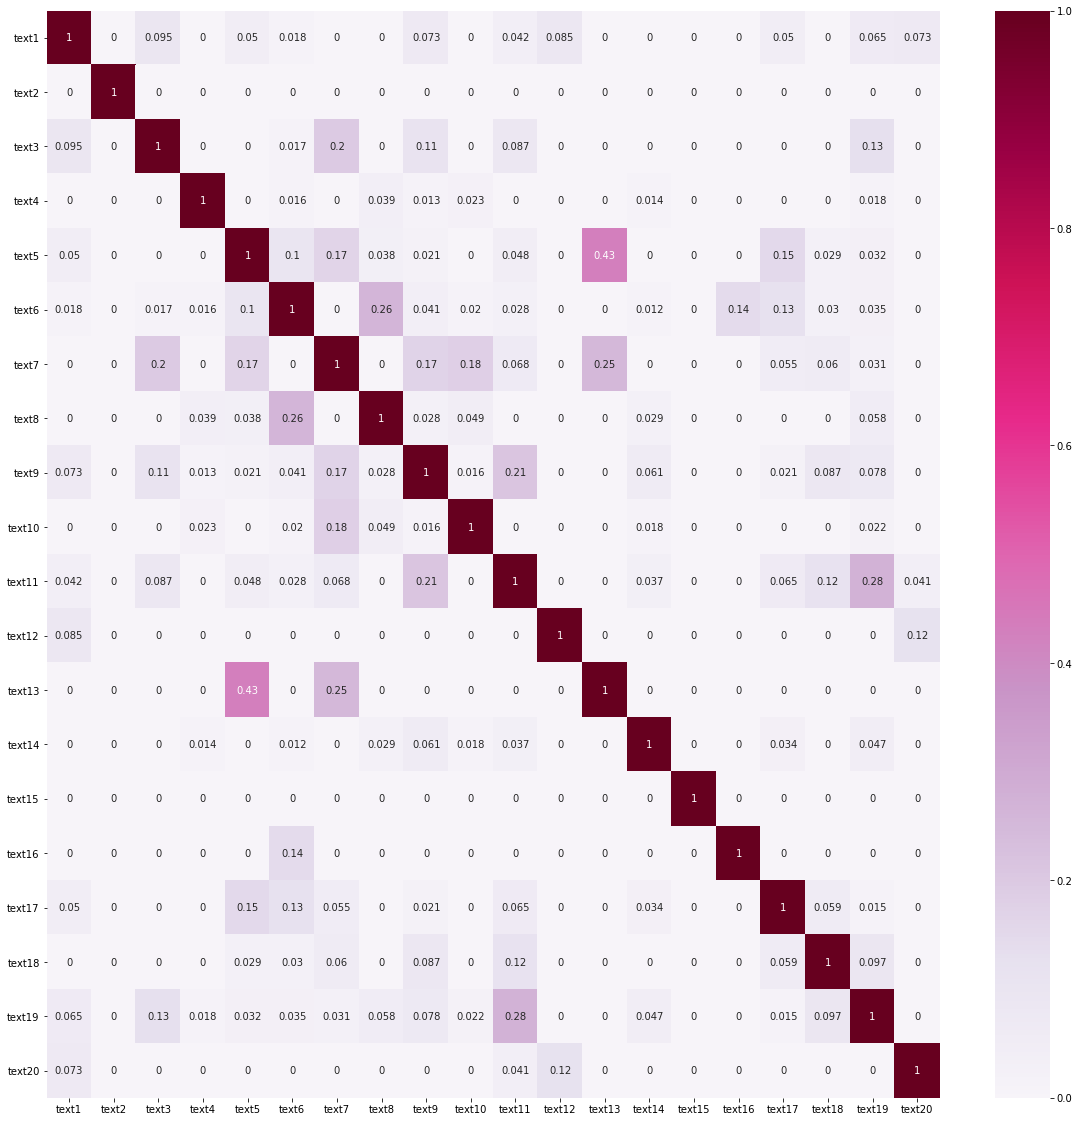

In [56]:
plot_x = ["text"+str(i+1) for i in range(20)]
plot_y = ["text"+ str(i+1) for i in range(20)]
plot_z = cosine_similarity(dt_tfidf)[80:100,80:100]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 20))

ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True)
plt.xticks(rotation=360)
plt.yticks(rotation=360)

### - cosine similarity of word frequency

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text yticklabel objects>)

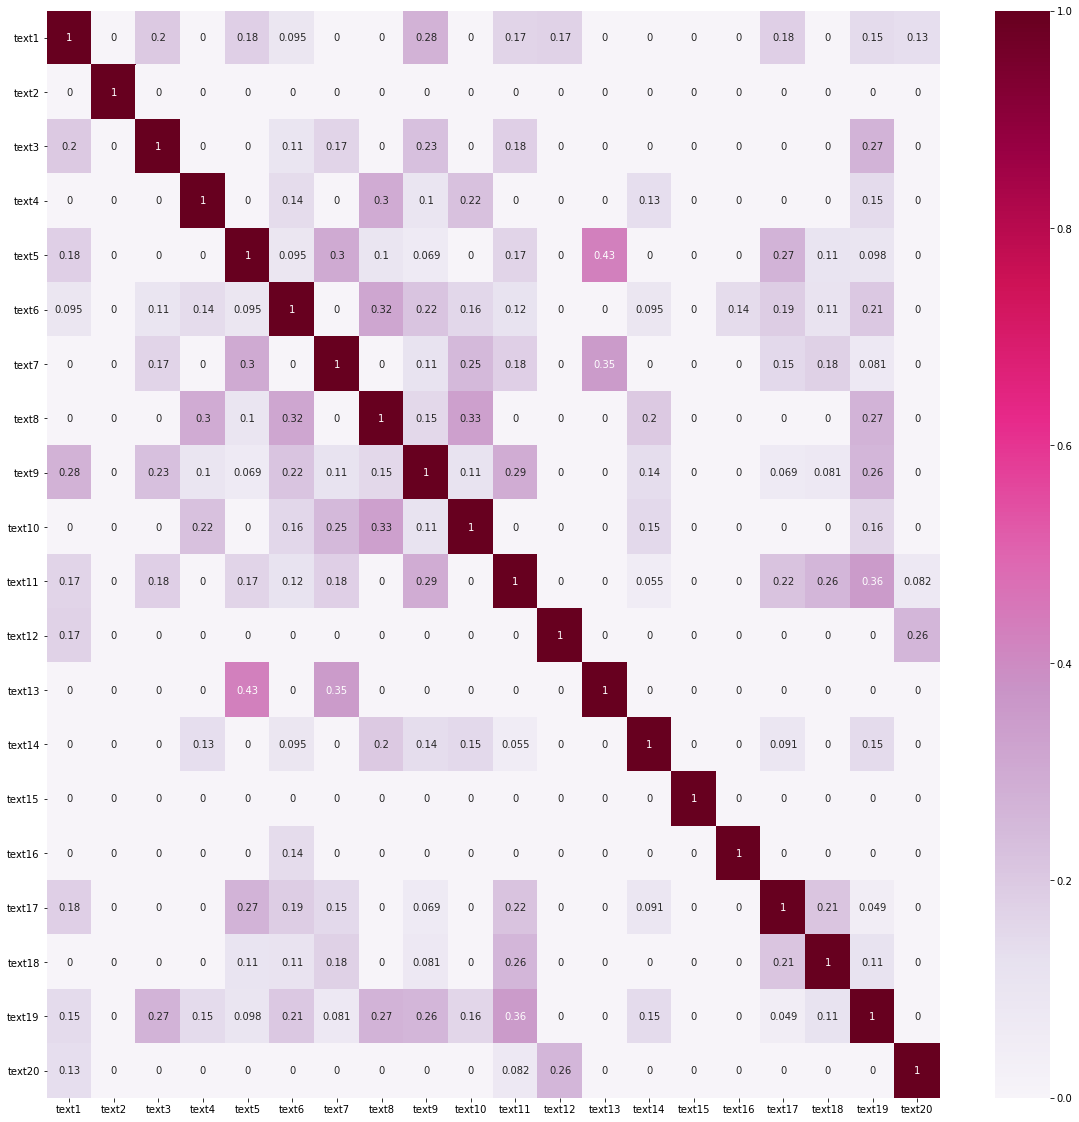

In [57]:
plot_x = ["text"+ str(i+1) for i in range(20)]
plot_y = ["text"+ str(i+1) for i in range(20)]
plot_z = cosine_similarity(dt_counts)[80:100,80:100]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 20))

ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True)
plt.xticks(rotation=360)
plt.yticks(rotation=360)

### - also choose 20 data to do euclidean distances (show by heat map)

### - distance of TF-IDF

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text yticklabel objects>)

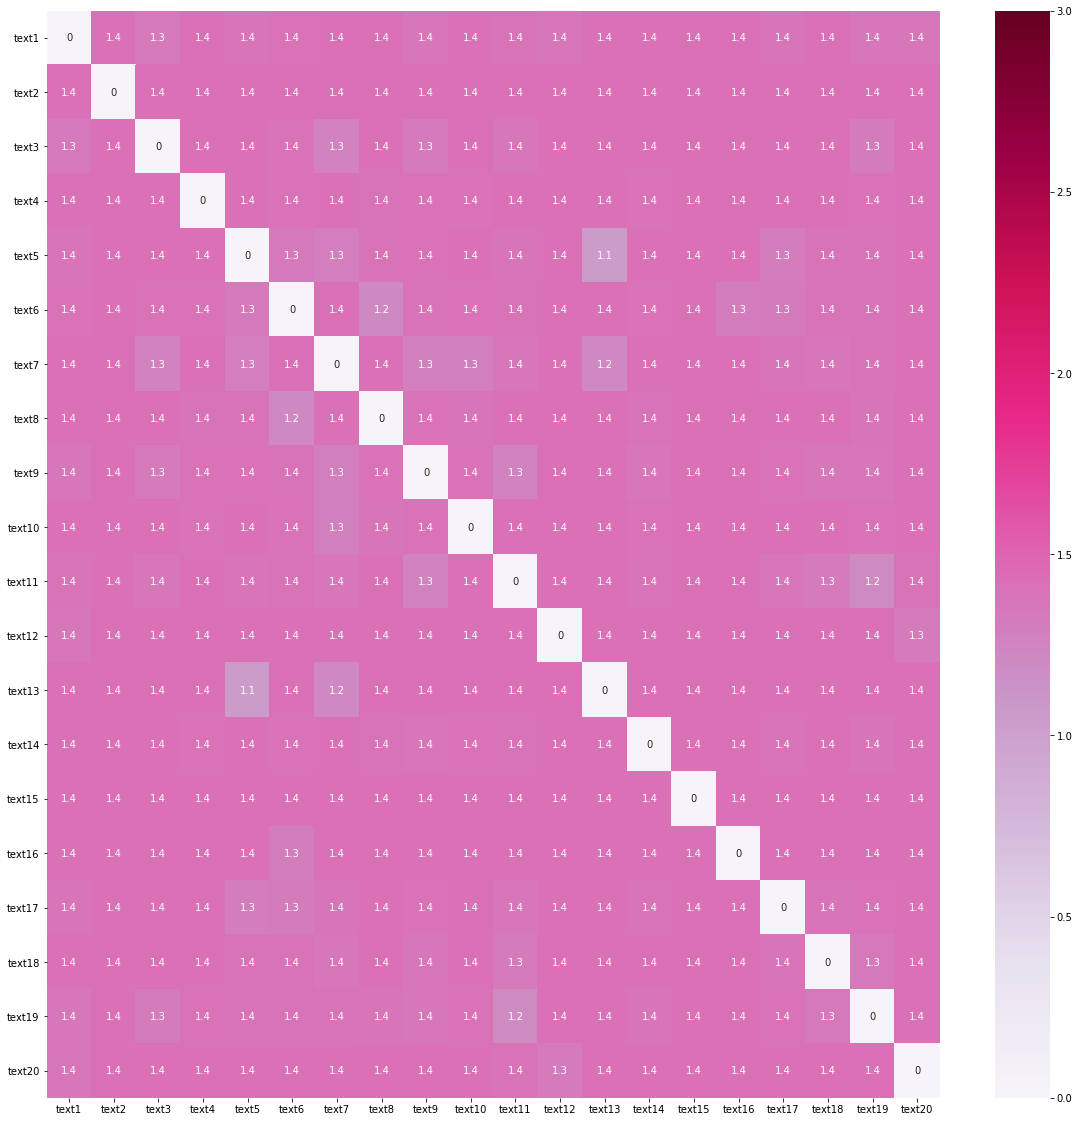

In [58]:
from sklearn.metrics.pairwise import euclidean_distances

plot_x = ["text"+ str(i+1) for i in range(20)]
plot_y = ["text"+ str(i+1) for i in range(20)]
plot_z = euclidean_distances(dt_tfidf)[80:100, 80:100]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=3, annot=True)
plt.xticks(rotation=360)
plt.yticks(rotation=360)

### - distance of word frequency

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text yticklabel objects>)

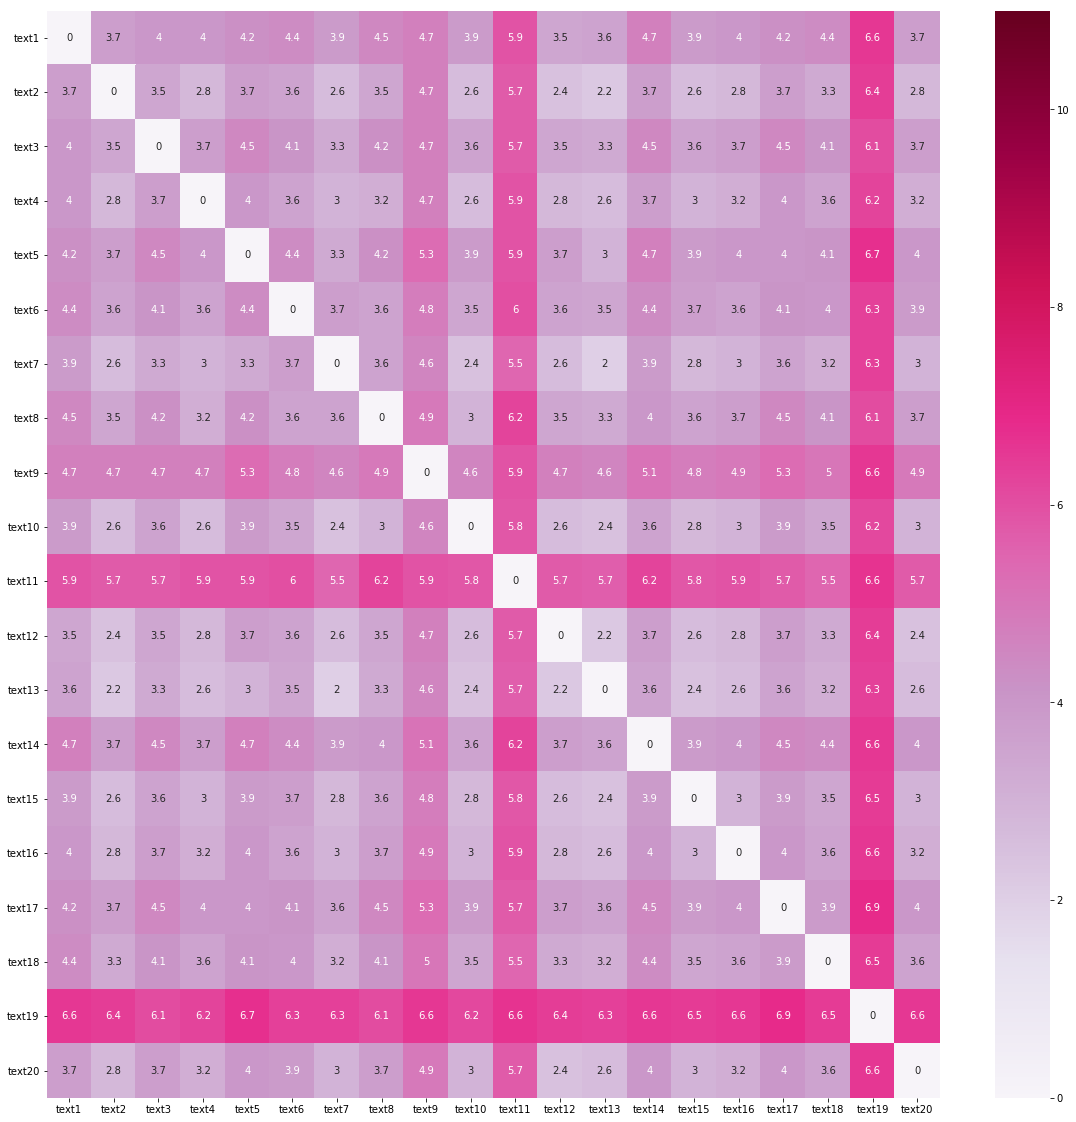

In [59]:
plot_x = ["text"+ str(i+1) for i in range(20)]
plot_y = ["text"+ str(i+1) for i in range(20)]
plot_z = euclidean_distances(dt_counts)[80:100, 80:100]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=11, annot=True)
plt.xticks(rotation=360)
plt.yticks(rotation=360)

## Part IV (Naive Bayes classifier)